In [118]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [119]:
import os,glob
df = pd.DataFrame()
folder_path = 'data'
for filename in glob.glob(os.path.join(folder_path, '*.csv')):
    with open(filename) as f:
        temp = pd.read_csv(filename)
        temp.Område = filename[5:-4]
        df = df.append(temp, ignore_index = True)

In [120]:
df = df.drop('Unnamed: 0', axis=1)

In [121]:
df['Område'] = df.Område.apply(lambda x: x.split(',\n ', 1)[0])

In [122]:
month_map = {
        'januari' : '01',
        'februari' : '02',
        'mars' : '03',
        'april': '04',
        'maj' : '05',
        'juni' : '06',
        'juli' : '07',
        'augusti' : '08',
        'september' : '09',
        'oktober' : '10',
        'november' : '11',
        'december' : '12'
    }
month_series = df.Datum.apply(lambda x: x[2:-4].strip(' ')).map(month_map)
day_series = df.Datum.apply(lambda x: '-' + x[:2] + '-')
year_series = df.Datum.apply(lambda x: x[-4:])
df.Datum = month_series+day_series+year_series
df.Datum = pd.to_datetime(df.Datum)

In [123]:
df.columns

Index(['index', 'Datum', 'Område', 'Pris per kvadratmeter', 'Begärt pris',
       'Antal rum', 'Boarea', 'Avgift/månad', 'Driftskostnad', 'Byggår',
       'Slutpris', 'Biarea'],
      dtype='object')

In [124]:
df = df.sort_values('Datum', ascending=False)

In [125]:
df.loc[~df.Byggår.isna(),'Byggår'] = df.loc[~df.Byggår.isna(),'Byggår'].map(lambda x: x[:4])
df['Byggår'] = pd.to_numeric(df['Byggår'], errors='coerce')

In [126]:
def feature_check(X):
    cat_cols = np.array([])
    for col_name in X.columns:
        if X[col_name].dtypes == 'object':
            unique_cat = len(X[col_name].unique())
            cat_cols = np.hstack([np.array(col_name), cat_cols])
            if unique_cat > 10:
                print("Feature '{col_name}' has {unique_cat} unique categories".format(
                        col_name=col_name, unique_cat=unique_cat))
            else:
                print("Feature '{col_name}' has {unique_cat} unique categories, which are {c}".format(
                    col_name=col_name, unique_cat=unique_cat,c=X[col_name].unique()))
    return cat_cols
  
cat_cols = feature_check(df)
#X.origin_up.unique()

Feature 'index' has 14568 unique categories
Feature 'Område' has 8 unique categories, which are ['sodermalm' 'gardet' 'kungsholmen' 'vasastan' 'lilla_essingen'
 'ostermalm' 'gamla_stan' 'stora_essingen']


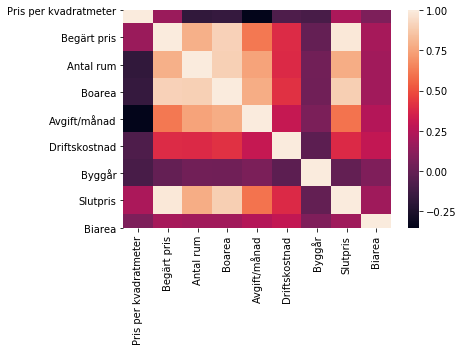

In [127]:
import seaborn as sns
sns.heatmap(df.corr())

In [128]:
df.corr()['Pris per kvadratmeter'].sort_values(ascending=False)

Pris per kvadratmeter    1.000000
Slutpris                 0.219585
Begärt pris              0.169107
Biarea                   0.075368
Driftskostnad           -0.074860
Byggår                  -0.099862
Boarea                  -0.160959
Antal rum               -0.178124
Avgift/månad            -0.353927
Name: Pris per kvadratmeter, dtype: float64

In [129]:
df.corr()['Avgift/månad'].sort_values(ascending=False)

Avgift/månad             1.000000
Boarea                   0.781296
Antal rum                0.750948
Begärt pris              0.618878
Slutpris                 0.603196
Driftskostnad            0.304426
Biarea                   0.246541
Byggår                   0.070040
Pris per kvadratmeter   -0.353927
Name: Avgift/månad, dtype: float64

In [130]:
df = df[~df['Begärt pris'].isna()]

In [131]:
df['Prisökning'] = (df['Slutpris'] - df['Begärt pris'])/df['Begärt pris']

In [132]:
df.corr()['Prisökning'].sort_values(ascending=False)

Prisökning               1.000000
Pris per kvadratmeter    0.346521
Byggår                  -0.038045
Driftskostnad           -0.141021
Biarea                  -0.183324
Slutpris                -0.203689
Antal rum               -0.303880
Begärt pris             -0.323077
Avgift/månad            -0.329920
Boarea                  -0.338118
Name: Prisökning, dtype: float64

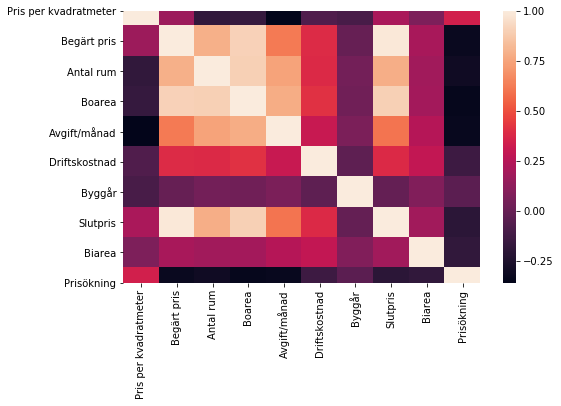

In [133]:
import seaborn as sns
fig = plt.figure(figsize=(8,5))
sns.heatmap(df.corr())

In [134]:
for c in df.Område.unique():
    print(c)

sodermalm
kungsholmen
vasastan
lilla_essingen
gardet
ostermalm
gamla_stan
stora_essingen


In [135]:
df.Datum.apply(lambda x : x.year).value_counts()

2019    7823
2018    3512
2017    1619
2016     802
2015     324
2014     285
2013     155
2012       1
Name: Datum, dtype: int64

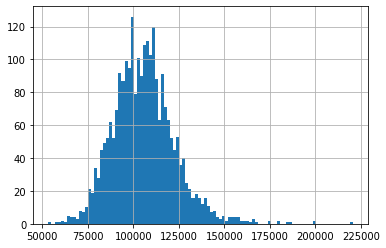

In [136]:
df.loc[df.Område == 'ostermalm', 'Pris per kvadratmeter'].hist(bins=100)

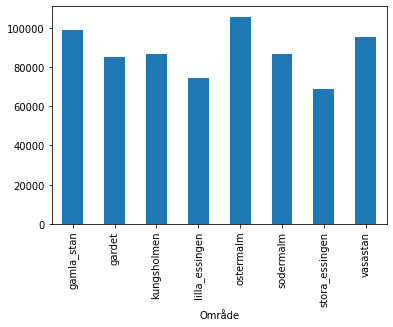

In [74]:
df[['Område', 'Pris per kvadratmeter']].groupby('Område').mean()['Pris per kvadratmeter'].plot.bar()

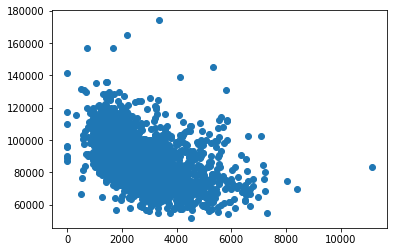

In [143]:
s = df.loc[df.Område == 'sodermalm']
plt.scatter(s['Avgift/månad'], s['Pris per kvadratmeter'])

,Pris per kvadratmeter
Datum,
2019-12-21,102500.0
2019-12-21,107955.0
2019-12-20,108500.0
2019-12-20,103704.0
2019-12-20,62202.0
...,...
2013-01-24,47500.0
2013-01-24,NaN
2013-01-16,47500.0


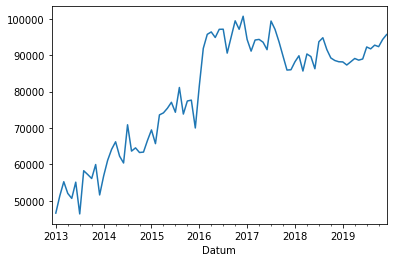

In [43]:
#s = df.loc[df.Område == 'vasastan']
df.index = df.Datum
df['Pris per kvadratmeter'].resample('m').mean().plot()

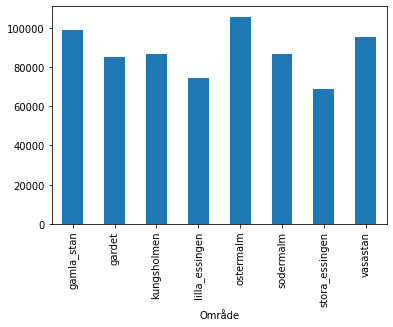

In [419]:
df.groupby('Område')['Pris per kvadratmeter'].mean().plot.bar()

In [331]:
df = df.reset_index(drop=True)

In [332]:
data = df.drop(['Slutpris', 'Pris per kvadratmeter', 'index'], axis=1)

In [333]:
data['Område'] = data['Område'].apply(lambda x: x.lower())

In [347]:
data.

,Begärt pris,Antal rum,Boarea,Avgift/månad,Driftskostnad,Byggår,Biarea,Prisökning,Område_gamla_stan,Område_gardet,Område_kungsholmen,Område_lilla_essingen,Område_ostermalm,Område_sodermalm,Område_stora_essingen,Område_vasastan
0,3495000.0,1.0,40.0,1160.0,9500.0,1889.0,NaN,0.173104,0,0,0,0,0,1,0,0
1,1995000.0,1.0,22.0,1581.0,2800.0,1937.0,NaN,0.190476,0,0,1,0,0,0,0,0
2,4495000.0,2.0,50.0,550.0,3600.0,1912.0,NaN,0.206897,0,0,0,0,0,0,0,1
3,2800000.0,1.0,27.0,790.0,4164.0,1937.0,NaN,0.000000,0,0,1,0,0,0,0,0
4,4995000.0,3.0,84.0,3689.0,5500.0,1939.0,NaN,0.046046,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14516,1950000.0,1.5,40.0,2269.0,3400.0,1939.0,NaN,-0.025641,0,0,0,1,0,0,0,0
14517,1650000.0,1.0,NaN,1623.0,NaN,1963.0,NaN,0.090909,0,0,0,1,0,0,0,0
14518,1995000.0,1.5,42.0,1575.0,4152.0,1937.0,NaN,0.000000,0,0,0,1,0,0,0,0
14519,1495000.0,1.0,NaN,1158.0,NaN,1939.0,NaN,0.137124,0,0,0,1,0,0,0,0


In [335]:
data.Område.value_counts().head(40)

ostermalm         2494
sodermalm         2494
vasastan          2489
kungsholmen       2489
gardet            2489
lilla_essingen    1196
stora_essingen     701
gamla_stan         169
Name: Område, dtype: int64

In [336]:
data = data.drop('Datum', axis=1)

In [337]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14521 entries, 0 to 14520
Data columns (total 9 columns):
Område           14521 non-null object
Begärt pris      14521 non-null float64
Antal rum        14515 non-null float64
Boarea           14512 non-null float64
Avgift/månad     14503 non-null float64
Driftskostnad    9488 non-null float64
Byggår           13549 non-null float64
Biarea           321 non-null float64
Prisökning       14521 non-null float64
dtypes: float64(8), object(1)
memory usage: 1021.1+ KB


In [338]:
data = pd.get_dummies(data)

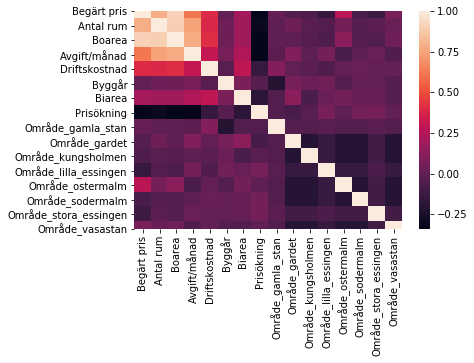

In [339]:
sns.heatmap(data.corr())

In [340]:
data.corr()['Prisökning'].sort_values(ascending=False)

Prisökning               1.000000
Område_lilla_essingen    0.067901
Område_stora_essingen    0.061823
Område_sodermalm         0.057544
Område_vasastan         -0.002221
Område_ostermalm        -0.012893
Område_kungsholmen      -0.029179
Byggår                  -0.038045
Område_gamla_stan       -0.053574
Område_gardet           -0.082736
Driftskostnad           -0.141021
Biarea                  -0.183324
Antal rum               -0.303880
Begärt pris             -0.323077
Avgift/månad            -0.329920
Boarea                  -0.338118
Name: Prisökning, dtype: float64

# Modeling

In [341]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train = scaler.fit_transform(data.drop('Prisökning', axis=1))
target = scaler.fit_transform(data['Prisökning'].values.reshape(-1,1))

x_train, x_test, y_train, y_test = train_test_split(train,
                                                    target,
                                                    test_size=.2,
                                                    random_state=42,
                                                    shuffle=True)

In [344]:
x_train

array([[0.02616427, 0.125     , 0.04037267, ..., 0.        , 0.        ,
        0.        ],
       [0.06850127, 0.25      , 0.19565217, ..., 0.        , 0.        ,
        0.        ],
       [0.02955123, 0.        , 0.02173913, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.02108383, 0.        , 0.03416149, ..., 0.        , 0.        ,
        0.        ],
       [0.04817951, 0.125     , 0.09006211, ..., 0.        , 0.        ,
        0.        ],
       [0.03124471, 0.        , 0.08385093, ..., 1.        , 0.        ,
        0.        ]])

In [342]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

models = {}

models['xgb'] = XGBRegressor(objective ='reg:squarederror', 
                         colsample_bytree = 0.3, 
                         learning_rate = 0.4,
                         max_depth = 20, 
                         alpha = 1, 
                         n_estimators = 500)

models['lgbm'] = LGBMRegressor(objective ='reg:squarederror', 
                         colsample_bytree = 0.3, 
                         learning_rate = 0.4,
                         max_depth = 20, 
                         alpha = 1, 
                         n_estimators = 500)


In [343]:
from sklearn.model_selection import RandomizedSearchCV

params = {'num_leaves': choice([27, 31, 61, 81, 127, 197, 231, 275, 302]),
              'bagging_fraction': choice([0.5, 0.7, 0.8, 0.9]),
              'learning_rate': choice([0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5]),
              'min_data': choice([300, 400, 450, 500, 550, 650]),
              'is_unbalance': choice([True, False]),
              'max_bin': choice([3, 5, 10, 12, 18, 20, 22]),
              'boosting_type' : choice(['gbdt', 'dart']),
              'bagging_freq': choice([3, 9, 11, 15, 17, 23, 31]),
              'max_depth': choice([3, 4, 5, 6, 7, 9, 11]),       
              'feature_fraction': choice([0.5, 0.7, 0.8, 0.9]),
              'lambda_l1': choice([0, 10, 20, 30, 40]),
              'metric': 'RMSE'} 


NameError: name 'choice' is not defined

In [168]:
cv = 5
n_jobs = -1
verbose = 1
scoring = 'RMSE'
for key in models.keys():
    print("Running Randomized Search for %s." % key)
    model = models[key]
    #params = params[key]
    gs = RandomizedSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                      verbose=verbose, scoring=scoring,
                      return_train_score=True)
    gs.fit(X,y)
    self.grid_searches[key] = gs

Running Randomized Search for xgb.


NameError: name 'RandomizedSearchCV' is not defined

In [154]:
y_pred = model.predict(x_test)

In [155]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.012727839633659515

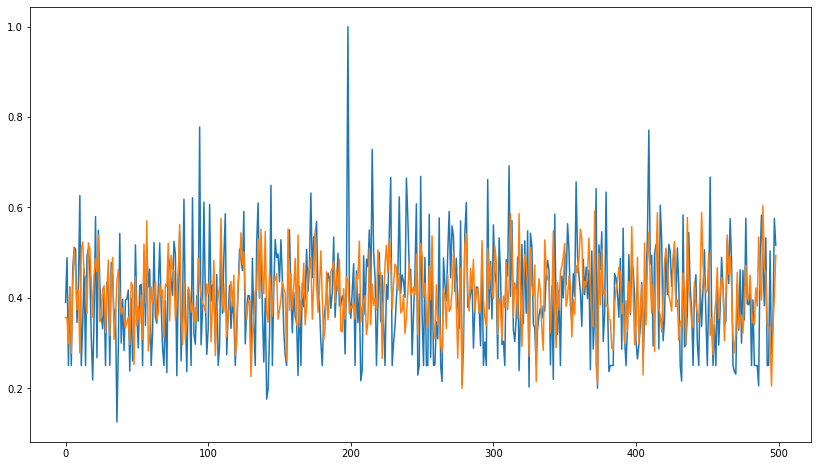

In [156]:
plt.figure(figsize=(14,8))
plt.plot(np.arange(len(y_test)), y_test)
plt.plot(np.arange(len(y_test)), y_pred)
plt.show()

In [163]:
np.abs((y_test.flatten() - y_pred)/y_test.flatten()).mean()

0.23866054868149175

In [159]:
y_pred

array([0.35631227, 0.35467136, 0.29903978, 0.42326233, 0.27721387,
       0.42671534, 0.51024836, 0.45662263, 0.3741877 , 0.41824135,
       0.27860987, 0.5081098 , 0.5237871 , 0.45332098, 0.44472408,
       0.3645807 , 0.5217646 , 0.5076005 , 0.43733957, 0.35699648,
       0.4516726 , 0.4866446 , 0.45825955, 0.5377762 , 0.3468147 ,
       0.35627377, 0.41874838, 0.42690283, 0.32240185, 0.4202932 ,
       0.48401338, 0.31621754, 0.44510618, 0.48947018, 0.3079542 ,
       0.35484353, 0.4359321 , 0.46294445, 0.40942252, 0.36482263,
       0.37746033, 0.35211647, 0.3331384 , 0.34706986, 0.35751984,
       0.29708886, 0.43424153, 0.42660353, 0.2525289 , 0.44650364,
       0.33850384, 0.38019678, 0.3430686 , 0.40463507, 0.30788082,
       0.5190883 , 0.389025  , 0.5706595 , 0.28243068, 0.3121196 ,
       0.42456868, 0.3899849 , 0.4136127 , 0.43632352, 0.35247785,
       0.3659727 , 0.43072426, 0.40348828, 0.4177683 , 0.31191552,
       0.43047783, 0.4251057 , 0.5208612 , 0.3494538 , 0.49467

In [67]:
5%-3

-1

In [176]:
dest = {'Södermalm':  'sodermalm.csv', 
        'Vasastan' : 'vasastan.csv',
        'Östermalm' :  'ostermalm.csv',
        'Kungsholmen' :  'kungsholmen.csv',
        'Gamla Stan' :  'gamla_stan.csv',
        'Stora Essingen' : 'stora_essingen.csv',
        'Lilla Essingen' : 'lilla_essingen.csv'}

In [179]:
'data/' + dest['Södermalm']

'data/sodermalm.csv'